# 📊 CRM 마케팅 및 세일즈 분석


## ✅ 3. 마케팅/세일즈 정보

| 열 이름                                     | 설명                     |
| ---------------------------------------- | ---------------------- |
| `Channel` 또는 `ContactSource`             | 리드 유입 채널 (웹사이트, 전시회 등) |
| `Marketing_Unit_Name`, `Sales_Unit_Name` | 담당 조직                  |
| `Sales_Territory_Name`                   | 세일즈 지역                 |
| `Source_Text`                            | 마케팅 유입 소스 설명           |
| `Owner_Party_Name`                       | 리드 담당자 이름              |

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
%matplotlib inline

In [17]:
# 데이터 로드
df = pd.read_csv('../data/leads.csv')

# 마케팅/세일즈 관련 컬럼 추출
marketing_cols = ['Channel', 'ContactSource',  'Source_Text', 'Owner_Party_Name']
df_mkt = df[marketing_cols]
df_mkt.head()

C:\Users\ha\AppData\Local\Temp\ipykernel_18372\1028863125.py:2: DtypeWarning: Columns (2,9,11,22,23,46,47,48,49,56,59,66,105,109,114,117,120,126,127,128,140,141,143,144,145,158,167,168,174,175,176,178,180) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/leads.csv')


,Channel,ContactSource,Source_Text,Owner_Party_Name
0,121.0,Z32,Web Member Registration,Lawrence Mullins
1,121.0,Z04,Website Contact Form,Angela Smith
2,121.0,Z33,e-Catalog,Laura Miles
3,121.0,Z32,Web Member Registration,Alicia Craig
4,121.0,Z34,Sealing Solutions Configurator,Jeremy Pearson


In [18]:
df_mkt.isnull().sum()

Channel             3660
ContactSource        785
Source_Text          784
Owner_Party_Name       0
dtype: int64

## 📈 리드 유입 채널 (Channel 또는 ContactSource)

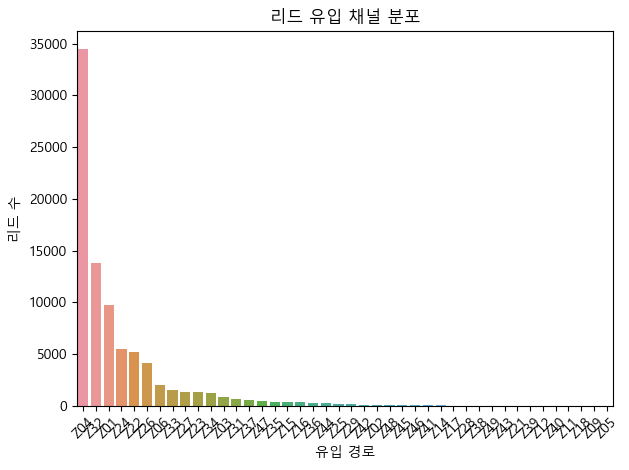

In [19]:

# 한글 폰트 설정 (예: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

sns.countplot(data=df_mkt, x='ContactSource', order=df_mkt['ContactSource'].value_counts().index)
plt.title('리드 유입 채널 분포')
plt.xlabel('유입 경로')
plt.ylabel('리드 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 📈 Sales Territory 분포

In [ ]:
sns.countplot(data=df_mkt, x='Sales_Territory_Name', order=df_mkt['Sales_Territory_Name'].value_counts().index)
plt.title('세일즈 지역 분포')
plt.xlabel('Sales Territory')
plt.ylabel('리드 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 📈 담당자별 리드 분포 (Owner_Party_Name 상위 10인)

In [40]:
df_mkt_cleaned = df_mkt.dropna()
#df_mkt_cleaned = df_mkt.dropna(subset=['Owner_Party_Name'])


In [41]:
df_mkt_cleaned.isnull().sum()

Channel             0
ContactSource       0
Source_Text         0
Owner_Party_Name    0
dtype: int64

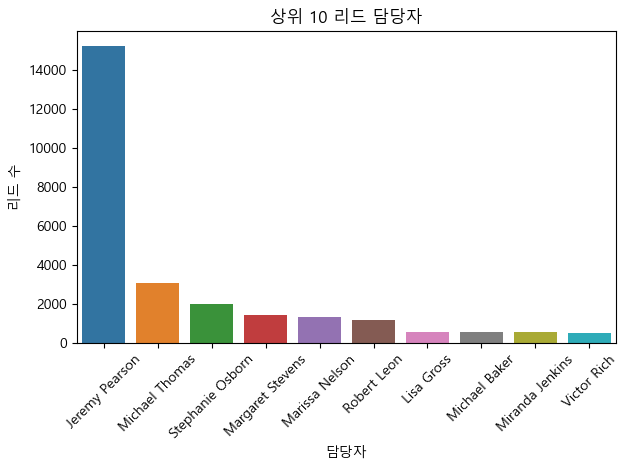

In [42]:
top_owners = df_mkt_cleaned['Owner_Party_Name'].value_counts().nlargest(10).index
sns.countplot(data=df_mkt_cleaned[df_mkt_cleaned['Owner_Party_Name'].isin(top_owners)], x='Owner_Party_Name', order=top_owners)
plt.title('상위 10 리드 담당자')
plt.xlabel('담당자')
plt.ylabel('리드 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 🤖 CRM 리드 상태 예측 (머신러닝 기반 분석)

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns', None)
%matplotlib inline

In [47]:

df = df.dropna(subset=['Status_Text'])
le = LabelEncoder()
df['Status_Label'] = le.fit_transform(df['Status_Text'])

In [45]:
# 숫자형 feature만 추출 (예측에 사용 가능)
X = df.select_dtypes(include='number').drop(columns=['Status_Label', 'Lead_Life_Cycle_Status_Code'], errors='ignore')
y = df['Status_Label']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.82      0.85      0.84     11443
           2       0.63      0.62      0.62      1204
           3       0.51      0.40      0.45      1080
           4       0.27      0.19      0.22       190
           5       0.57      0.53      0.55      3180

    accuracy                           0.74     17097
   macro avg       0.56      0.52      0.54     17097
weighted avg       0.73      0.74      0.74     17097



## 📉 혼동 행렬

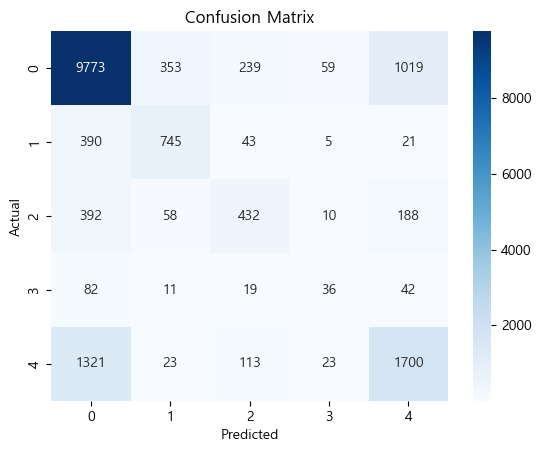

In [31]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 📊 Feature Importance

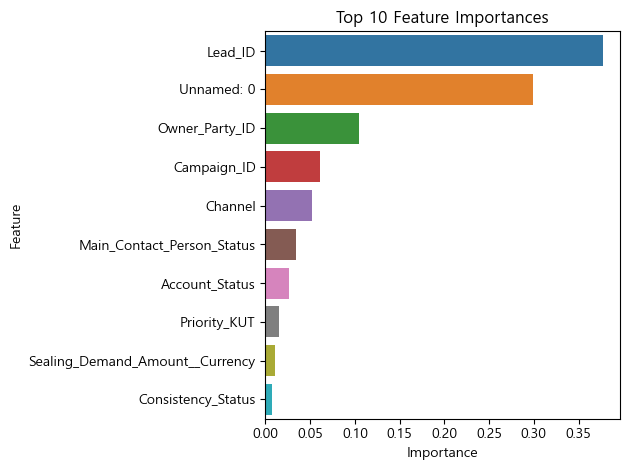

In [32]:
importances = pd.Series(clf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)
sns.barplot(x=top_features.values, y=top_features.index)
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()